In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Import data
df = pd.read_csv('/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/california_house_prices.csv')

# Read dataset
coast = gpd.read_file('/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/california_coastline.shp')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.46,37.74,51,1905,291,707,284,6.2561,431000
1,-122.00,36.93,51,1616,374,608,302,3.1932,400000
2,-122.47,37.75,51,2413,431,1095,437,4.0089,357000
3,-118.30,34.19,51,1502,243,586,231,4.3750,332400
4,-118.32,33.83,51,2399,516,1160,514,3.8456,318900
...,...,...,...,...,...,...,...,...,...
15262,-117.23,33.83,2,1424,251,681,192,4.0833,100000
15263,-119.88,36.83,2,4055,735,1730,654,4.2132,96500
15264,-115.80,33.26,2,96,18,30,16,5.3374,47500
15265,-122.00,38.23,1,2062,343,872,268,5.2636,191300


In [4]:
coast

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COUNTY_,COUNTY_ID,LUCODE,STATE,geometry
0,297,291,1,24,15270.99572,113,12,2,CA,"MULTILINESTRING ((-124.22911 40.74913, -124.22..."


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

In [7]:
# Compute distance to Space Needle 
distance_to_coast = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_coast'] = distance_to_coast

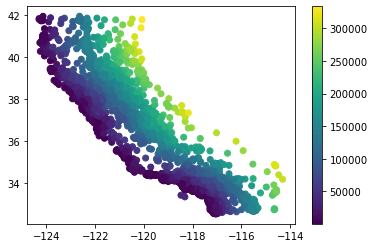

In [8]:
# Quickly check that it worked!
plt.scatter(gdf_utm['longitude'], gdf_utm['latitude'], c=gdf_utm['distance_to_coast'])
plt.colorbar()

In [9]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.668566
total_rooms           0.152923
households            0.098525
total_bedrooms        0.079023
population            0.020930
housing_median_age    0.014355
longitude            -0.020092
latitude             -0.173908
distance_to_coast    -0.505078
Name: median_house_value, dtype: float64

In [10]:
# Rooms per house
gdf_utm['rooms_per_house'] = gdf_utm['total_rooms'] / gdf_utm['households']

# Bedrooms per house
gdf_utm['bedrooms_per_room'] = gdf_utm['total_bedrooms'] / gdf_utm['total_rooms']

In [11]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.668566
total_rooms           0.152923
rooms_per_house       0.113277
households            0.098525
total_bedrooms        0.079023
population            0.020930
housing_median_age    0.014355
longitude            -0.020092
latitude             -0.173908
bedrooms_per_room    -0.233964
distance_to_coast    -0.505078
Name: median_house_value, dtype: float64

In [12]:
# Define feature list
feature_list =  ['median_income', 'distance_to_coast', 'bedrooms_per_room', 
                 'total_rooms', 'rooms_per_house', 'total_bedrooms', 'households']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['median_house_value']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [13]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [15]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

55771.87429558656

# Question 1 

In [16]:
#from sklearn.ensemble import RandomForestRegressor

#forest_reg = RandomForestRegressor(n_estimators = 30)

#forest_reg.fit 

In [17]:
# Import data for Seattle 
seattle_data = pd.read_csv('/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/seattle_house_prices.csv')

# Read dataset
seattle_coast = gpd.read_file('/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/washington_coastline.shp')

In [18]:
seattle_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long'],
      dtype='object')

In [19]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19451 non-null  int64  
 1   bedrooms     19451 non-null  int64  
 2   bathrooms    19451 non-null  float64
 3   sqft_living  19451 non-null  int64  
 4   sqft_lot     19451 non-null  int64  
 5   yr_built     19451 non-null  int64  
 6   lat          19451 non-null  float64
 7   long         19451 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [20]:
seattle_coast_utm = seattle_coast.to_crs(32610)

In [21]:
seattle_coast_utm

,NAME,MTFCC,geometry
0,Pacific,L4150,"LINESTRING (505407.678 5323560.749, 505406.177..."
1,Pacific,L4150,"LINESTRING (544009.095 5240908.754, 544015.188..."
2,Pacific,L4150,"LINESTRING (524251.546 5362207.085, 524261.425..."
3,Pacific,L4150,"LINESTRING (543812.537 5345133.673, 543810.169..."
4,Pacific,L4150,"LINESTRING (420246.733 5124016.964, 419988.090..."
...,...,...,...
165,Pacific,L4150,"LINESTRING (424777.900 5081688.350, 424801.962..."
166,Pacific,L4150,"LINESTRING (443524.779 5118719.482, 443512.294..."
167,Pacific,L4150,"LINESTRING (447014.682 5121216.461, 447041.556..."
168,Pacific,L4150,"LINESTRING (447495.516 5121428.219, 447457.454..."


In [22]:
# Check the number of houses 
seattle_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319
1,180000,2,1.00,770,10000,1933,47.7379,-122.233
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005
...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069


In [23]:
seattle_data.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
19446,False,False,False,False,False,False,False,False
19447,False,False,False,False,False,False,False,False
19448,False,False,False,False,False,False,False,False
19449,False,False,False,False,False,False,False,False


In [24]:
# Check the null value in dataset 
print(seattle_data.isnull().sum())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
yr_built       0
lat            0
long           0
dtype: int64


In [25]:
# Convert DataFrame to GeoDataFrame
seattle_gdf = gpd.GeoDataFrame(seattle_data, geometry=gpd.points_from_xy(seattle_data['long'], seattle_data['lat']))
seattle_gdf = seattle_gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
seattle_gdf_utm = seattle_gdf.to_crs('EPSG:32610')
seattle_coast_utm = seattle_coast.to_crs('EPSG:32610')


In [26]:
# Compute distance to coast
seattle_coast = []
for i in range(seattle_gdf_utm.shape[0]):
    seattle_coast.append(seattle_coast_utm.distance(seattle_gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
seattle_gdf_utm['seattle_coast'] = seattle_coast

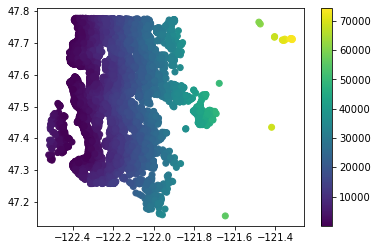

In [27]:
# Quickly check that it worked!
plt.scatter(seattle_gdf_utm['long'], seattle_gdf_utm['lat'], c=seattle_gdf_utm['seattle_coast'])
plt.colorbar()

In [28]:
gdf_utm.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'geometry', 'distance_to_coast',
       'rooms_per_house', 'bedrooms_per_room'],
      dtype='object')

In [29]:
seattle_gdf_utm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry', 'seattle_coast'],
      dtype='object')

# Question 2, 4-5

In [30]:
# Compute correlation matrix
corr_matrix = seattle_gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price            1.000000
sqft_living      0.702296
bathrooms        0.524395
bedrooms         0.315804
lat              0.308082
sqft_lot         0.090125
yr_built         0.052453
seattle_coast    0.027830
long             0.020092
Name: price, dtype: float64

# Question 3

In [31]:
seattle_data.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,geometry
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
19446,False,False,False,False,False,False,False,False,False
19447,False,False,False,False,False,False,False,False,False
19448,False,False,False,False,False,False,False,False,False
19449,False,False,False,False,False,False,False,False,False


In [32]:
# Import library
from sklearn.preprocessing import StandardScaler
# Define feature list
seattle_feature_list =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long']

# Define features and labels 
seattle_X = seattle_gdf_utm[seattle_feature_list]
seattle_y = seattle_gdf_utm['price']

# Standarize data
seattle_scaler = StandardScaler()  
seattle_X_scaled = seattle_scaler.fit_transform(seattle_X)

In [33]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(seattle_X_scaled, seattle_y, test_size=0.2, random_state=42)

In [34]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [35]:
# Predict test labels predictions
seattle_predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , seattle_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

161998.9710966534

# Check for correlation 

In [36]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

sea = pd.read_csv("/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/seattle_house_prices.csv")
sea_gdf = gpd.GeoDataFrame(sea, geometry = gpd.points_from_xy(sea['long'], sea['lat']))
sea_gdf = sea_gdf.set_crs(4326, allow_override=True)
# Reproject everything to UTM 10N (EPSG:32610)
sea_utm = sea_gdf.to_crs('EPSG:32610')

rand_point = Point(5.6e5, 5.27e6)
rand_gdf = gpd.GeoDataFrame(geometry = [rand_point])
rand_gdf = rand_gdf.set_crs(32610)
dist_sea_rand_pnt = []
for i in range(sea_utm.shape[0]):
    dist_sea_rand_pnt.append(rand_gdf.distance(sea_utm['geometry'].iloc[i]).min())

# Correlation matrix for square foot divide by bedroom

In [37]:
# House size
seattle_gdf_utm['house_size'] = seattle_gdf_utm['sqft_living'] / seattle_gdf_utm['sqft_lot']

In [38]:
seattle_gdf_utm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry', 'seattle_coast', 'house_size'],
      dtype='object')

In [39]:
# Import library
from sklearn.preprocessing import StandardScaler
# Define feature list
seattle_feature_list =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long','house_size']

# Define features and labels 
seattle_X = seattle_gdf_utm[seattle_feature_list]
seattle_y = seattle_gdf_utm['price']

# Standarize data
seattle_scaler = StandardScaler()  
seattle_X_scaled = seattle_scaler.fit_transform(seattle_X)


In [40]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(seattle_X_scaled, seattle_y, test_size=0.2, random_state=42)

# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

# Predict test labels predictions
seattle_predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
seattle_final_mse = mean_squared_error(y_test , seattle_predictions)
seattle_final_rmse = np.sqrt(seattle_final_mse)
seattle_final_rmse

153023.53775454397

# Compute distance to Washington Park Arboretum UW Seattle

In [41]:
#47.63982848173617, -122.29614021004966
from shapely.geometry import Point
uw_arboretum = Point( -122.28120001226782, 47.6167207495107)
uw_arboretum_gdf = gpd.GeoDataFrame(geometry = [uw_arboretum], crs = 4326)
uw_arboretum_gdf = uw_arboretum_gdf.to_crs("EPSG:32610")
distance_to_Arboretum = []
for i in range(seattle_gdf_utm.shape[0]):
    distance_to_Arboretum.append(uw_arboretum_gdf.distance(seattle_gdf_utm['geometry'].iloc[i]).min())
# Add to DataFrame
seattle_gdf_utm['distance_to_Arboretum'] = distance_to_Arboretum

In [42]:
seattle_gdf_utm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry', 'seattle_coast', 'house_size',
       'distance_to_Arboretum'],
      dtype='object')

In [43]:
# Import library
from sklearn.preprocessing import StandardScaler
# Define feature list
seattle_feature_list =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long','distance_to_Arboretum']

# Define features and labels 
seattle_X = seattle_gdf_utm[seattle_feature_list]
seattle_y = seattle_gdf_utm['price']

# Standarize data
seattle_scaler = StandardScaler()  
seattle_X_scaled = seattle_scaler.fit_transform(seattle_X)

In [44]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(seattle_X_scaled, seattle_y, test_size=0.2, random_state=42)

In [45]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [46]:
# Predict test labels predictions
seattle_predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
seattle_final_mse = mean_squared_error(y_test , seattle_predictions)
seattle_final_rmse = np.sqrt(seattle_final_mse)
seattle_final_rmse

150907.06671017915

# Compute distance to Seattle University, WA 

In [47]:
# 47.609774530443964, -122.3177216635164
from shapely.geometry import Point
seattle_University = Point(-122.3177216635164, 47.609774530443964)
seattle_University_gdf = gpd.GeoDataFrame(geometry = [seattle_University], crs = 4326)
seattle_University_gdf = seattle_University_gdf.to_crs("EPSG:32610")
distance_to_seattle_University = []
for i in range(seattle_gdf_utm.shape[0]):
    distance_to_seattle_University.append(seattle_University_gdf.distance(seattle_gdf_utm['geometry'].iloc[i]).min())
# Add to DataFrame
seattle_gdf_utm['distance_to_seattle_University'] = distance_to_seattle_University

In [48]:
seattle_gdf_utm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry', 'seattle_coast', 'house_size',
       'distance_to_Arboretum', 'distance_to_seattle_University'],
      dtype='object')

In [49]:
# Import library
from sklearn.preprocessing import StandardScaler
# Define feature list
seattle_feature_list =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'distance_to_seattle_University']

# Define features and labels 
seattle_X = seattle_gdf_utm[seattle_feature_list]
seattle_y = seattle_gdf_utm['price']

# Standarize data
seattle_scaler = StandardScaler()  
seattle_X_scaled = seattle_scaler.fit_transform(seattle_X)

In [50]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(seattle_X_scaled, seattle_y, test_size=0.2, random_state=42)

In [51]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [52]:
# Predict test labels predictions
seattle_predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
seattle_final_mse = mean_squared_error(y_test , seattle_predictions)
seattle_final_rmse = np.sqrt(seattle_final_mse)
seattle_final_rmse

155020.88638338653

# Questions/Answers

# Insang Demo

In [53]:
from shapely.geometry import Point
rand_point = Point(5.6e5, 5.27e6)
rand_gdf = gpd.GeoDataFrame(geometry = [rand_point])

<AxesSubplot:>

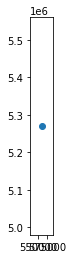

In [54]:
rand_gdf.plot()